# Make a Ghost

### Import opencv and numpy

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

## How can we create a simple ghost? 

### Lets get the boilerplate out of the way. and read in some photos.

In [2]:
strPath = 'inputFiles3/'
bg    = cv2.imread(strPath+'bg.jpg')[:,:,::-1]
left  = cv2.imread(strPath+'left.jpg')[:,:,::-1]
right = cv2.imread(strPath+'right.jpg')[:,:,::-1]
imgArr = [left,right]

### show the photos

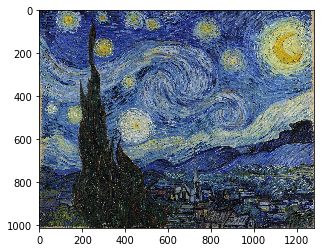

In [3]:
#background
plt.imshow(bg)

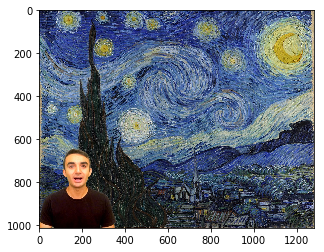

In [4]:
#left
plt.imshow(imgArr[0])

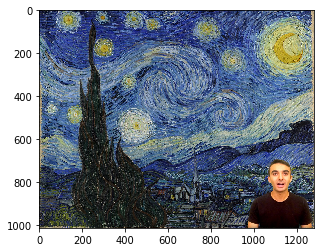

In [5]:
#right
plt.imshow(imgArr[1])

### Now lets try something simple lets add the photos together

In [6]:
def addPhotos(arrPhotos):
    dst = np.zeros(arrPhotos[0].shape,np.uint8)
    for i in range(len(arrPhotos)):
        dst = cv2.add(arrPhotos[i],dst)
    return dst

### Lets Make 1 ghost on the left this way

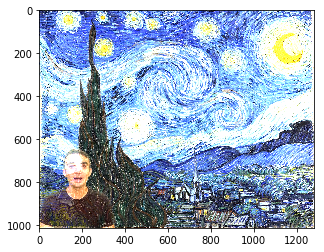

In [7]:
plt.imshow(addPhotos([left,bg]))

### Now 1 on the right.

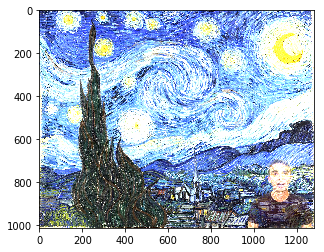

In [8]:
plt.imshow(addPhotos([right,bg]))

### Now 2 ghosts

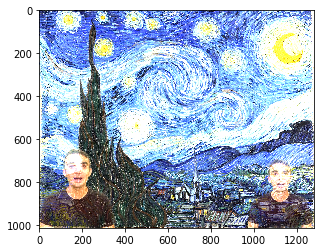

In [10]:
plt.imshow(addPhotos([right,left]))

## Unfortunately this approach causes the color saturation to go up, we need something better

### What i we just added the diffs?

In [22]:
def addJustDiff(arrPhotos):
    #dst = addPhotos(arrPhotos)
    #dst = cv2.divide(dst,len(arrPhotos))
    #dst = cv2.multiply(dst,1.0/(len(arrPhotos)))
    dst = np.zeros(arrPhotos[0].shape,np.uint8)
    for i in range(len(arrPhotos)):
        diff = cv2.absdiff(arrPhotos[i], dst)
        dst = cv2.add(diff,dst)
    return dst

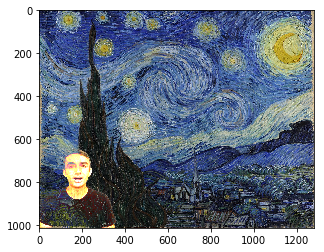

In [23]:
plt.imshow(addJustDiff([left,bg]))

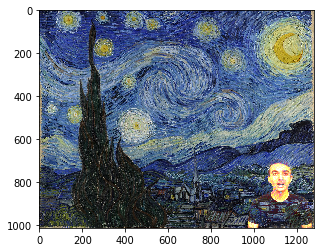

In [24]:
plt.imshow(addJustDiff([right,bg]))

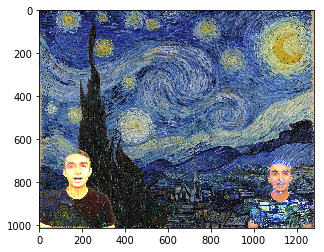

In [25]:
plt.imshow(addJustDiff(imgArr))

## While it is less noticeable the color saturation is now only on our ghosts. We can still do better, lets try some background subtraction.

### write a function to subtract the background from the foreground

In [11]:
def subtractBg(fgPic, bgPic):
    #img = fgPic - bgPic
    frame_diff = cv2.absdiff(fgPic, bgPic)
    gray_diff = cv2.cvtColor(frame_diff, cv2.COLOR_BGR2GRAY)
    mask = cv2.inRange(gray_diff, 10, 255)
    res = cv2.bitwise_and(fgPic,fgPic, mask= mask)
    return res, mask

### write a function to optionally apply the mask

In [12]:
def addPhotosWithMask(arrPhotos, bg,bUseMask=True):
    #res = cv2.mean(np.array(arrPhotos))
    dst = bg.copy()
    for i in range(len(arrPhotos)):
        sub, mask = subtractBg(arrPhotos[i], bg)
        if(bUseMask):
            maskBGR = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)
            dst = cv2.subtract(dst,maskBGR)
        dst = cv2.add(sub,dst)
    return dst

### When we don't apply the mask, we get the ghost image we desire.

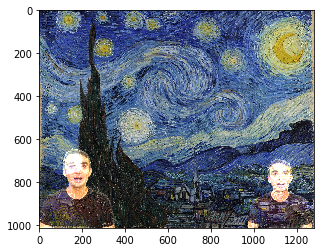

In [13]:
plt.imshow(addPhotosWithMask(imgArr, bg,False))

### now if we apply the mask we get a concatenation of the two images

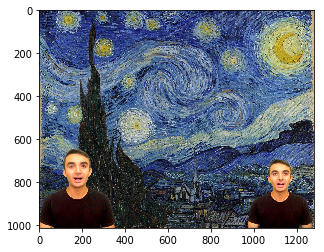

In [14]:
plt.imshow(addPhotosWithMask(imgArr, bg))

### How does this work? Lets take a look at the subtracted images and the masks.

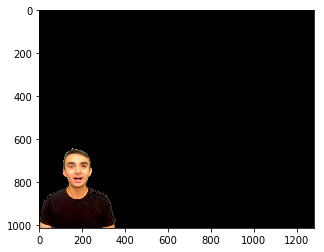

In [15]:
subLeftFromBg, maskl = subtractBg(imgArr[0],bg)
plt.imshow(subLeftFromBg)

### We get the image above by applying the mask below

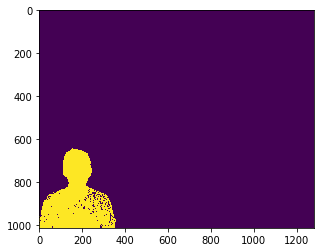

In [16]:
plt.imshow(maskl)

### It is the same for the right side

In [17]:
subRIghtFromBg,maskr = subtractBg(imgArr[1],bg)

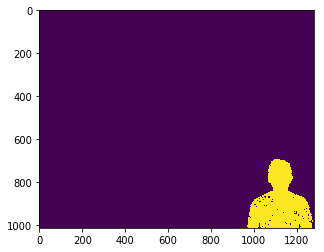

In [18]:
plt.imshow(maskr)

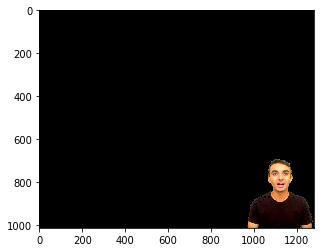

In [19]:
plt.imshow(subRIghtFromBg)